# Lab 02: Vectors and Geometry

### Author: Jack Stoetzel [jstoetzel1@gulls.salisbury.edu]

### Date: September 10, 2020

### Objectives:
1. Gain familiarity with the Python programming language
2. Use the OOP aspects of Python
3. Do some basic data plotting and visualization

In [1]:
import math
import matplotlib.pyplot as plt

In [2]:
class Vector:
    
    def __init__(self, x=0, y=0):
        self.x = x
        self.y = y
        
    def __add__(self,right):
        return (Vector(self.x + right.x, self.y + right.y))
    
    def __sub__(self,right):
        return (Vector(self.x - right.x, self.y - right.y))
    
    def dotProduct(self, right):
        return (self.x * right.x) + (self.y * right.y)
    
    def distance(self, right):
        return math.sqrt(pow(self.x - right.x, 2) + pow(self.y - right.y, 2))
    
    def __str__(self):
        return f"Vector ({self.x},{self.y})"
    
    def __eq__(self, right):
        if self.x == right.x and self.y == right.y:
            return True
        else:
            return False

In [3]:
v1 = Vector(4,7)
v2 = Vector(1,3)

print(v1 + v2)
print(v1 - v2)
print(v1.dotProduct(v2))
print(v1.distance(v2))

Vector (5,10)
Vector (3,4)
25
5.0


In [4]:
class Geometry:
    
    def __init__(self):
        self.vertices = []
        self.faces = []
    
    def add(self, v1=Vector(0,0), v2=Vector(0,0)):
        if v1 != v2:
            print(f"Adding {v1} to {v2}")
            self.faces.append([v1, v2])
            
        if v1 not in self.vertices:
            self.vertices.append(v1)
        if v2 not in self.vertices:
            self.vertices.append(v2)
        
    def isClosed(self):
        for one in range(len(self.faces)):
            connected = False
            for two in range(len(self.faces)):
                if self.faces[one][0] == self.faces[two][1]:
                    connected = True
                    
            if not connected:
                return False
            
        for one in range(len(self.faces)):
            connected = False
            for two in range(len(self.faces)):
                if self.faces[two][0] == self.faces[one][1]:
                    connected = True
                    
            if not connected:
                return False
            
        return True
    
    def draw(self):
        Xs = [x.x for face in self.faces for x in face]

        Ys = [y.y for face in self.faces for y in face]

        for num in range(0, len(Xs), 2):
            plt.plot(
                        [Xs[num], Xs[num+1]], 
                        [Ys[num], Ys[num+1]], 
                        color = "#1f77b4",
                        label = "face " + str(num/2)
                    )
    
    def isInside(self, p1):
        def Dir(p, q, r):
            l1 = p - q
            l2 = q - r
            
            direction = (l1.x * l2.y) - (l1.y * l2.x)

            if direction >= 0:
                return True
            if direction < 0:
                return False
        
        plt.plot(
                    p1.x, p1.y, 'ro',
                    color = "red",
                    label = "Point"
                    )
        
        if not self.isClosed():
            return False;
        
        Xs = [x.x for face in self.faces for x in face]
        p2 = Vector(max(Xs)+1, p1.y)
        
        count = 0
        for face in self.faces:
            if Dir(p2, p1, face[0]) != Dir(p2, p1, face[1]) and Dir(face[0], face[1], p1) != Dir(face[0], face[1], p2):
                count = count + 1
        
        if count % 2 == 0:
            return False
        else:
            return True

Adding Vector (1,5) to Vector (3,1)
Adding Vector (3,1) to Vector (7,3)
Adding Vector (7,3) to Vector (5,7)
Adding Vector (5,7) to Vector (1,5)

Is the shape closed: True
Is Vector (4,4) inside the shape: True


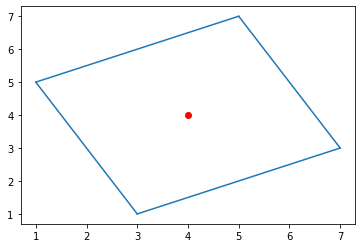

In [5]:
box = Geometry()
box.add(Vector(1,5), Vector(3,1))
box.add(Vector(3,1), Vector(7,3))
box.add(Vector(7,3), Vector(5,7))
box.add(Vector(5,7), Vector(1,5))

print()
print(f"Is the shape closed: {box.isClosed()}")
print(f"Is {Vector(4,4)} inside the shape: {box.isInside(Vector(4,4))}")
box.draw()


Adding Vector (3,1) to Vector (7,3)
Adding Vector (7,3) to Vector (5,7)
Adding Vector (5,7) to Vector (4,4)
Adding Vector (4,4) to Vector (1,5)
Adding Vector (1,5) to Vector (3,1)

Is the shape closed: True
Is Vector (3,5) inside the shape: False


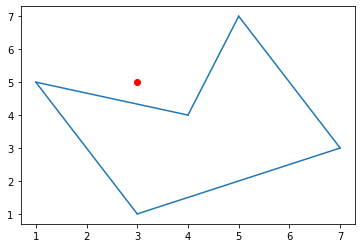

In [6]:
crown = Geometry()
crown.add(Vector(3,1), Vector(7,3))
crown.add(Vector(7,3), Vector(5,7))
crown.add(Vector(5,7), Vector(4,4))
crown.add(Vector(4,4), Vector(1,5))
crown.add(Vector(1,5), Vector(3,1))

print()
print(f"Is the shape closed: {crown.isClosed()}")
print(f"Is {Vector(3,5)} inside the shape: {crown.isInside(Vector(3,5))}")
crown.draw()

Adding Vector (1,5) to Vector (3,1)
Adding Vector (3,1) to Vector (7,3)
Adding Vector (7,3) to Vector (5,7)

Is the shape closed: False
Is Vector (4,4) inside the shape: False


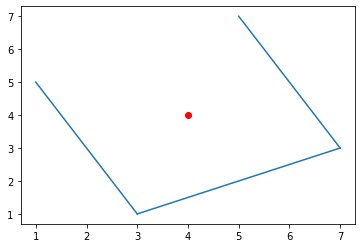

In [7]:
openBox = Geometry()
openBox.add(Vector(1,5), Vector(3,1))
openBox.add(Vector(3,1), Vector(7,3))
openBox.add(Vector(7,3), Vector(5,7))

print()
print(f"Is the shape closed: {openBox.isClosed()}")
print(f"Is {Vector(4,4)} inside the shape: {openBox.isInside(Vector(4,4))}")
openBox.draw()

Adding Vector (1,1) to Vector (4,1)
Adding Vector (4,1) to Vector (1,5)
Adding Vector (1,5) to Vector (1,1)

Is the shape closed: True
Is Vector (3,4) inside the shape: False


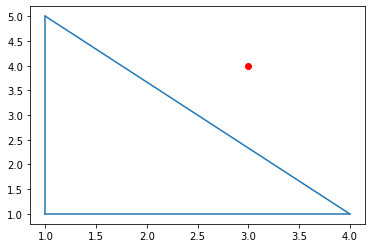

In [8]:
triangle = Geometry()
triangle.add(Vector(1,1), Vector(4,1))
triangle.add(Vector(4,1), Vector(1,5))
triangle.add(Vector(1,5), Vector(1,1))

print()
print(f"Is the shape closed: {triangle.isClosed()}")
print(f"Is {Vector(3,4)} inside the shape: {triangle.isInside(Vector(3,4))}")
triangle.draw()

Adding Vector (1,1) to Vector (5,1)
Adding Vector (5,1) to Vector (5,3)
Adding Vector (5,3) to Vector (3,6)
Adding Vector (3,6) to Vector (1,3)
Adding Vector (1,3) to Vector (1,1)

Is the shape closed: True
Is Vector (3,3) inside the shape: True


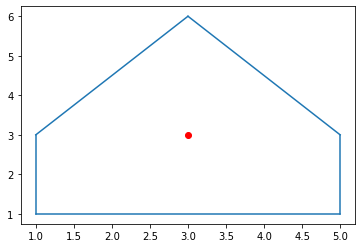

In [9]:
house = Geometry()
house.add(Vector(1,1), Vector(5,1))
house.add(Vector(5,1), Vector(5,3))
house.add(Vector(5,3), Vector(3,6))
house.add(Vector(3,6), Vector(1,3))
house.add(Vector(1,3), Vector(1,1))

print()
print(f"Is the shape closed: {house.isClosed()}")
print(f"Is {Vector(3,3)} inside the shape: {house.isInside(Vector(3,3))}")
house.draw()